In [13]:
import numpy as np
import math
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
data = pd.read_csv('Dose.csv')
data

,Region,Current,CE,Pass,Diameter,DE
0,1,0.0077,0.000077,1,8.0,0.5
1,2,0.0240,0.000240,1,10.5,0.5
2,3,0.0800,0.000800,1,14.0,2.0
3,4,0.4300,0.004300,1,30.0,2.0
4,5,0.7900,0.007900,2,38.0,2.0
5,6,0.7900,0.007900,10,38.0,2.0


In [15]:
#dwell has unit ns
dwell = 1e-6

#current has unit A
current = []
# current = unc.ufloat(data['Current'],data['CE'])   
for i in [0,1,2,3,4,5]:
    current.append(unc.ufloat(data['Current'][i],  data['CE'][i])*1e-9)
overlap = 2
multip =  data['Pass']

#diameter has unit m
diameter = []
for i in [0,1,2,3,4,5]:
    diameter.append(unc.ufloat(data['Diameter'][i],  data['DE'][i])*1e-9)
radius = []
for i in [0,1,2,3,4,5]:
    radius.append(diameter[i]/2)
ctoe = 6.242e18

#dose in  cm^-2
dose = []
for i in [0,1,2,3,4,5]:
    dose.append(current[i]*ctoe*dwell*overlap*multip[i]/(math.pi*radius[i]**2)/(100)**2)


In [16]:
multip

0     1
1     1
2     1
3     1
4     2
5    10
Name: Pass, dtype: int64

In [17]:
current

[7.700000000000002e-12+/-7.7e-14,
 2.4e-11+/-2.4000000000000004e-13,
 8.000000000000001e-11+/-8.000000000000001e-13,
 4.3e-10+/-4.300000000000001e-12,
 7.900000000000001e-10+/-7.900000000000001e-12,
 7.900000000000001e-10+/-7.900000000000001e-12]

In [18]:
for i in [0,1,2,3,4,5]:
    print('Region',i,': {:.2uP} cm^-2'.format(dose[i]))

Region 0 : (1.91±0.24)×10¹⁴ cm^-2
Region 1 : (3.46±0.33)×10¹⁴ cm^-2
Region 2 : (6.5±1.9)×10¹⁴ cm^-2
Region 3 : (7.6±1.0)×10¹⁴ cm^-2
Region 4 : (1.74±0.18)×10¹⁵ cm^-2
Region 5 : (8.70±0.92)×10¹⁵ cm^-2


In [19]:
for i in [0,1,2,3,4,5]:
    print('Region',i,': {:.2uP} nA'.format(current[i]*1e9))

Region 0 : 0.007700±0.000077 nA
Region 1 : 0.02400±0.00024 nA
Region 2 : 0.08000±0.00080 nA
Region 3 : 0.4300±0.0043 nA
Region 4 : 0.7900±0.0079 nA
Region 5 : 0.7900±0.0079 nA


In [20]:
dose_value = unp.nominal_values(dose)
count = [1.2e4, 1.4e4, 1.6e4, 2.5e4, 2e4, 1.7e4]

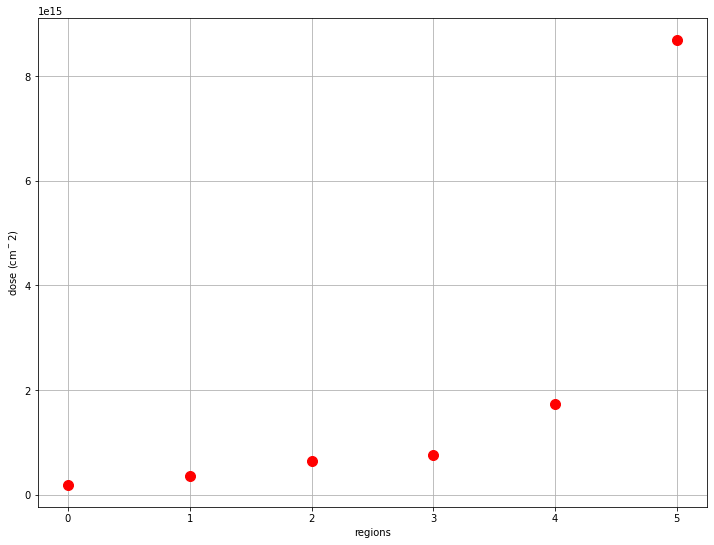

In [21]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'regions')
plt.ylabel(r'dose (cm$^-2$)')
plt.plot(dose_value,'.r', markersize = 20);


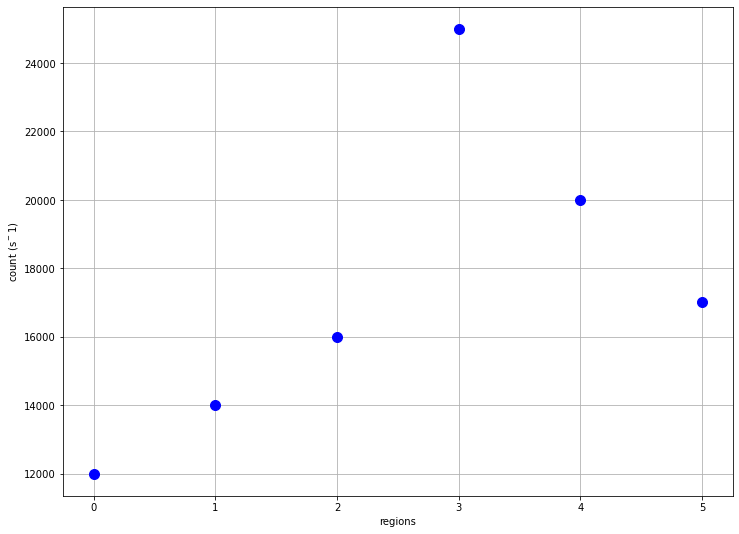

In [22]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'regions')
plt.ylabel(r'count (s$^-1$)')
plt.plot(count,'.b', markersize = 20);

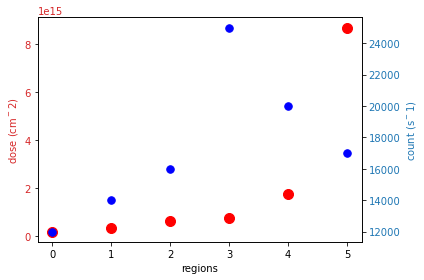

In [23]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('regions')
ax1.set_ylabel('dose (cm$^-2$)', color=color)
ax1.plot(dose_value,'.r', markersize = 20)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('count (s$^-1$)', color=color)  # we already handled the x-label with ax1
ax2.plot(count,'.b', markersize = 15)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()